In [33]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, cross_validation, metrics
from sklearn import tree, linear_model, feature_selection, ensemble
import matplotlib.pyplot as plt

#Import training data
df = pd.read_csv('census_income_learn.csv',header=None)
#print(df.head())
#print(len(df)) #199,523

# No header, so I decided to make a header row

titles = ['age',
          'class of worker',
          'detailed industry recode',
          'detailed occupation recode',
          'education',
          'wage per hour',
          'enroll in edu inst last wk',
          'marital stat',
          'major industry code',
          'major occupation code',
          'race',
          'hispanic origin',
          'sex',
          'member of a labor union',
          'reason for unemployment',
          'full or part time employment stat',
          'capital gains',
          'capital losses',
          'dividends from stock',
          'tax filer stat',
          'region of previous residence',
          'state of prevous residence',
          'detailed household and family stat',
          'detailed household summary in household',
          'instance weight',
          'migration code-change in msa',
          'migration code-change in reg',
          'migration code-move within region',
          'live in this house 1 year ago',
          'migration prev res in sunbelt',
          'num persons worked for employer',
          'family members under 18',
          'country of birth father',
          'country of birth mother',
          'country of birth self',
          'citizenship',
          'own business or self employed',
          "fill inc questionnaire for veteran's admin",
          'veterans benefits',
          'weeks worked in year',
          'year',
          'income']

#import training data with headers
df = pd.read_csv('census_income_learn.csv',header=None,names=titles)
print(df.head())

#Import test data
dftest = pd.read_csv('census_income_test.csv',header=None,names=titles)

   age                  class of worker  detailed industry recode  \
0   73                  Not in universe                         0   
1   58   Self-employed-not incorporated                         4   
2   18                  Not in universe                         0   
3    9                  Not in universe                         0   
4   10                  Not in universe                         0   

   detailed occupation recode                    education  wage per hour  \
0                           0         High school graduate              0   
1                          34   Some college but no degree              0   
2                           0                   10th grade              0   
3                           0                     Children              0   
4                           0                     Children              0   

  enroll in edu inst last wk    marital stat           major industry code  \
0            Not in universe         Widowed

In [34]:
print(len(dftest))


99762


When I first imported the data, the first thing I noticed was that there were no category headers for the variables, so I decided to make labels for the variables using the information from the *census_income_metadata.txt* file.

Once I had labeled each variable, I looked at the variables that were 'object' datatypes and found the value counts for each variable. To save space and make this presentation easier to read, I only printed the counts for the first 3 variables.

In [36]:
obj = df.select_dtypes(include=['object'])
#print(obj.head())

count = [0 for x in range(len(obj.columns))]
for i in range(len(obj.columns)):
    count[i] = obj[obj.columns.values[i]].value_counts()

#d = {'' : pd.Series(range(len(obj.columns)),index=obj.columns)}
#print(d['class of worker'])
#print(pd.DataFrame(d))

print('\n',count[0],'\n','\n',count[1],'\n','\n',count[2])

grouped = df.groupby('income')


  Not in universe                   100245
 Private                            72028
 Self-employed-not incorporated      8445
 Local government                    7784
 State government                    4227
 Self-employed-incorporated          3265
 Federal government                  2925
 Never worked                         439
 Without pay                          165
Name: class of worker, dtype: int64 
 
  High school graduate                      48407
 Children                                  47422
 Some college but no degree                27820
 Bachelors degree(BA AB BS)                19865
 7th and 8th grade                          8007
 10th grade                                 7557
 11th grade                                 6876
 Masters degree(MA MS MEng MEd MSW MBA)     6541
 9th grade                                  6230
 Associates degree-occup /vocational        5358
 Associates degree-academic program         4363
 5th or 6th grade                        

### Visualizations

count    199523.000000
mean         34.494199
std          22.310895
min           0.000000
25%          15.000000
50%          33.000000
75%          50.000000
max          90.000000
Name: age, dtype: float64 



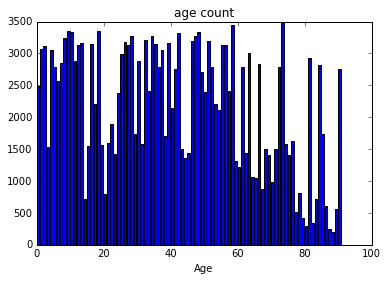

In [11]:
print(df.age.describe(),'\n')

%matplotlib inline

x = df.age.unique()
y = df.age.value_counts()
#grouped['age'].value_counts().unstack(level=0) #.plot(kind='bar',stacked=True,sort_columns=True,title='age')



plt.bar(x,y)
plt.title('age count')
plt.xlabel('Age')
plt.show()

#%matplotlib inline

#print(df['age'].value_counts())
#print(age2group['savings'].value_counts())

plt.savefig('age.png')

The age for this census data ranges from 0-90 years old. The average age is around 34.5 years old and ages are varied randomly; they do not seem to follow a set distribution. Ideally, this distribution is representative of the actual age distribution in the US. Age is probably a factor in determining savings because older people may earn more and may save more.

 Not in universe                   100245
 Private                            72028
 Self-employed-not incorporated      8445
 Local government                    7784
 State government                    4227
 Self-employed-incorporated          3265
 Federal government                  2925
 Never worked                         439
 Without pay                          165
Name: class of worker, dtype: int64
income     income   
 - 50000.   - 50000.    187141
 50000+.    50000+.      12382
Name: income, dtype: int64


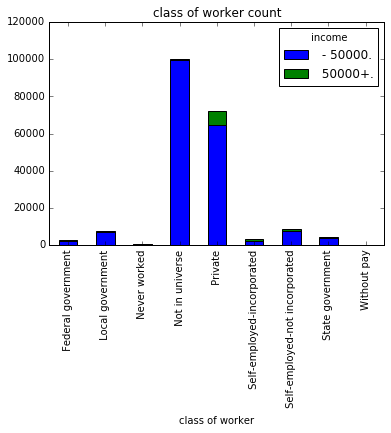

In [37]:
#df['class of worker'].value_counts().plot(kind='bar',title='class of worker count')
%matplotlib inline

print(df['class of worker'].value_counts())
print(grouped['income'].value_counts())

grouped['class of worker'].value_counts().unstack(level=0).plot(kind='bar',stacked=True,title='class of worker count')
plt.savefig('classofworker.png')

Looking at the 'class of worker' attribute, I see that about half of the data is missing. Of the data we have, a large majority of people work in the private sector. 

In [ ]:
%matplotlib inline
x = df['detailed industry recode'].unique()
y = df['detailed industry recode'].value_counts()
plt.bar(x,y)
plt.title('detailed industry recode count')
plt.xlabel('detailed industry recode')
plt.show()

%matplotlib inline
x = df['detailed occupation recode'].unique()
y = df['detailed occupation recode'].value_counts()
plt.bar(x,y)
plt.title('detailed occupation recode count')
plt.xlabel('detailed occupation recode')
plt.show()

For the 'detailed industry recode' and 'detailed occupuation recode', a very significant majority of codes for both variables are 0. The metadata does not specify what the numbers represent in within each variable, but I would not be surprised if '0' represents missing data. The industry and occupation probably does affect savings as some occupations and industries are more lucrative than others.

 High school graduate                      48407
 Children                                  47422
 Some college but no degree                27820
 Bachelors degree(BA AB BS)                19865
 7th and 8th grade                          8007
 10th grade                                 7557
 11th grade                                 6876
 Masters degree(MA MS MEng MEd MSW MBA)     6541
 9th grade                                  6230
 Associates degree-occup /vocational        5358
 Associates degree-academic program         4363
 5th or 6th grade                           3277
 12th grade no diploma                      2126
 1st 2nd 3rd or 4th grade                   1799
 Prof school degree (MD DDS DVM LLB JD)     1793
 Doctorate degree(PhD EdD)                  1263
 Less than 1st grade                         819
Name: education, dtype: int64
income     education                              
 - 50000.   Children                                  47422
            High school gr

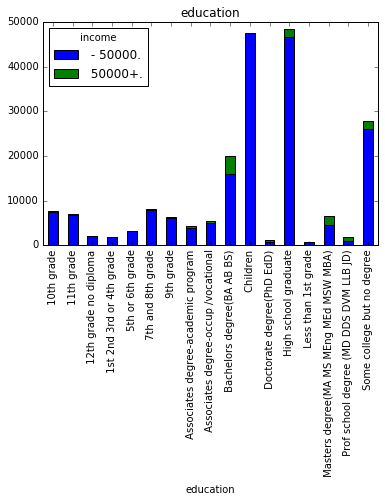

In [38]:
%matplotlib inline
print(df['education'].value_counts())
print(grouped['education'].value_counts())

grouped['education'].value_counts().unstack(level=0).plot(kind='bar',stacked=True,title='education')
plt.savefig('edu.png')

Nearly 50,000 people have their High School diploma, almost as many fall in the children category (which I believe represents no schooling beyond Kindergarten) and almost as many have had at least some college education or a Bachelor's degree. I think that education will probably have an influence on savings because those with a higher education probably make more money and thus are able to save more.

 Not in universe          186943
 High school                6892
 College or university      5688
Name: enroll in edu inst last wk, dtype: int64
savings    enroll in edu inst last wk
 - 50000.   Not in universe              174591
            High school                    6887
            College or university          5663
 50000+.    Not in universe               12352
            College or university            25
            High school                       5
Name: enroll in edu inst last wk, dtype: int64


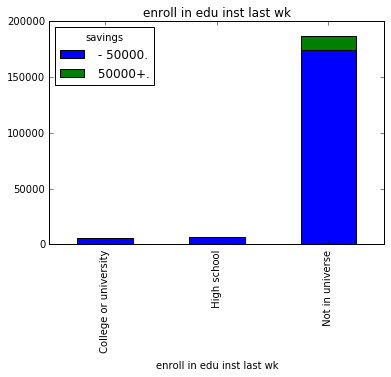

In [15]:
%matplotlib inline
print(df['enroll in edu inst last wk'].value_counts())
print(grouped['enroll in edu inst last wk'].value_counts())

grouped['enroll in edu inst last wk'].value_counts().unstack(level=0).plot(kind='bar',stacked=True,title='enroll in edu inst last wk')

plt.savefig('enroll.png')

Nearly all of the data for this attribute is missing. A very small portion were enrolled in either high school or college last week. Because so much data is missing, I do not think that this attribute will significantly help determine savings and I plan to remove it from the variable subset that I'll use to train my classifier.

 Never married                      86485
 Married-civilian spouse present    84222
 Divorced                           12710
 Widowed                            10463
 Separated                           3460
 Married-spouse absent               1518
 Married-A F spouse present           665
Name: marital stat, dtype: int64
savings    marital stat                    
 - 50000.   Never married                      85368
            Married-civilian spouse present    74622
            Divorced                           11644
            Widowed                            10133
            Separated                           3302
            Married-spouse absent               1422
            Married-A F spouse present           650
 50000+.    Married-civilian spouse present     9600
            Never married                       1117
            Divorced                            1066
            Widowed                              330
            Separated                         

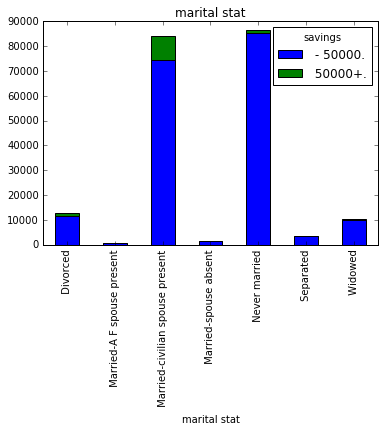

In [16]:
%matplotlib inline
print(df['marital stat'].value_counts())
print(grouped['marital stat'].value_counts())

grouped['marital stat'].value_counts().unstack(level=0).plot(kind='bar',stacked=True,title='marital stat')
plt.savefig('mar.png')

Marital status may influence savings, but I don't think it is as significant as some other attributes

 Not in universe or children            100684
 Retail trade                            17070
 Manufacturing-durable goods              9015
 Education                                8283
 Manufacturing-nondurable goods           6897
 Finance insurance and real estate        6145
 Construction                             5984
 Business and repair services             5651
 Medical except hospital                  4683
 Public administration                    4610
 Other professional services              4482
 Transportation                           4209
 Hospital services                        3964
 Wholesale trade                          3596
 Agriculture                              3023
 Personal services except private HH      2937
 Social services                          2549
 Entertainment                            1651
 Communications                           1181
 Utilities and sanitary services          1178
 Private household services                945
 Mining      

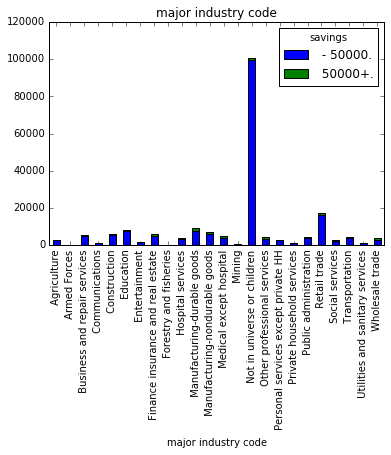

In [17]:
print(count[4])
%matplotlib inline
grouped['major industry code'].value_counts().unstack(level=0).plot(kind='bar',stacked=True,title='major industry code')

In [ ]:
print(count[5])
%matplotlib inline
df['major occupation code'].value_counts().plot(kind='bar',title='major occupation code')

 White                          167365
 Black                           20415
 Asian or Pacific Islander        5835
 Other                            3657
 Amer Indian Aleut or Eskimo      2251
Name: race, dtype: int64
income     race                        
 - 50000.   White                          156093
            Black                           19875
            Asian or Pacific Islander        5405
            Other                            3566
            Amer Indian Aleut or Eskimo      2202
 50000+.    White                           11272
            Black                             540
            Asian or Pacific Islander         430
            Other                              91
            Amer Indian Aleut or Eskimo        49
Name: race, dtype: int64


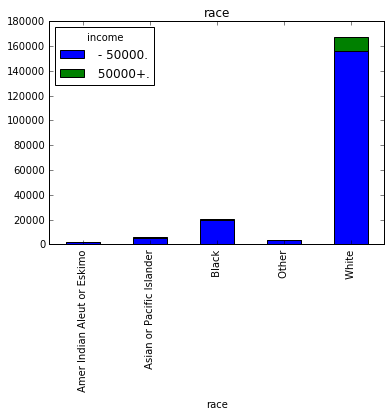

In [40]:
%matplotlib inline
print(df['race'].value_counts())
print(grouped['race'].value_counts())

grouped['race'].value_counts().unstack(level=0).plot(kind='bar',stacked=True,title='race')

plt.savefig('race.png')

Race may influence savings. Minorities in the US tend to earn less and thus affecting ability to save.

In [ ]:
print(count[7])
%matplotlib inline
df['hispanic origin'].value_counts().plot(kind='bar',title='hispanic origin')

 Female    103984
 Male       95539
Name: sex, dtype: int64
income     sex    
 - 50000.   Female    101321
            Male       85820
 50000+.    Male        9719
            Female      2663
Name: sex, dtype: int64


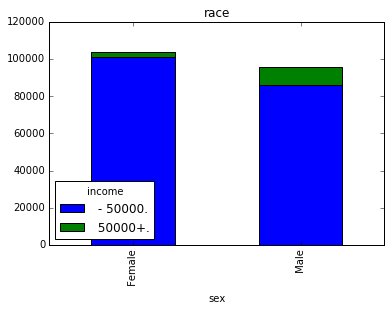

In [42]:
%matplotlib inline
print(df['sex'].value_counts())
print(grouped['sex'].value_counts())

grouped['sex'].value_counts().unstack(level=0).plot(kind='bar',stacked=True,title='race')

plt.savefig('sex.png')

Sex may also influence savings. Men tend to earn more than women and thus may be able to save more. The fact that these ratios are relatively equal is a good indication that the population is well-sampled (at least in regards to sex).

In [ ]:
print(count[12])
%matplotlib inline
df['tax filer stat'].value_counts().plot(kind='bar',title='tax filer stat')

In [ ]:
print(count[26])
%matplotlib inline
df.citizenship.value_counts().plot(kind='bar',title='citizenship')

In [ ]:
%matplotlib inline
wkswrkgroup = df.groupby('weeks worked in year')
print(df['weeks worked in year'].value_counts())
print(wkswrkgroup['savings'].value_counts())

wkswrkgroup['savings'].value_counts().unstack().plot(kind='bar',stacked=True,title='weeks worked in year')
plt.savefig('wkswrk.png')

The vast majority of people either worked 0 weeks (which may represent missing information or unemployment or both) or 52 weeks, meaning they had no time off

 - 50000.    187141
 50000+.      12382
Name: income, dtype: int64
Percent who make under $50,000 = 93.8%
Precent who make over $50,000 = 6.2%


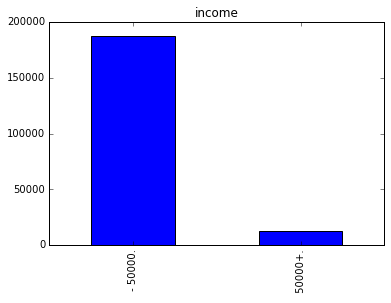

In [45]:
print(count[28])
%matplotlib inline
df.income.value_counts().plot(kind='bar',title='income')

print('Percent who make under $50,000 = %.1f'
      % (df.income.value_counts()[0]/len(df)*100)+'%')
print('Precent who make over $50,000 = %.1f'
      % (df.income.value_counts()[1]/len(df)*100)+'%')

Looking at the bar graph for savings, I immediately notice a *very* unbalanced class proportion: 93.8% save less than 50,000 vs. 6.2% save more. This will skew the accuracy rate when I train the classifier.



Many of object-type variables have missing data represented by the values 'Not in universe' or '?', so I found the percentage of the missing data for each variable. To do this, I looked through each variable in the count output and found all which had missing values. Then, I created a 'objects with missing values' dataframe and calculated the missing value percentages for each variable.

In [19]:
miss_obj = obj.drop(['education',
                     'marital stat',
                     'race',
                     'hispanic origin',
                     'sex',
                     'full or part time employment stat',
                     'tax filer stat',
                     'detailed household and family stat',
                     'detailed household summary in household',
                     'citizenship',
                     'savings'], 1)
#print(miss_obj.columns)
#print(len(miss_obj.columns))

# Calculate the missing value percentages

miss = [0 for x in range(len(miss_obj.columns))]
for i in range(len(miss_obj.columns)):
    if i == 7: #'state of previous residence has 'Not in universe' and '?' values
        miss[i] = ((miss_obj[miss_obj.columns.values[i]].value_counts()[0]+
                    obj[obj.columns.values[i]].value_counts()[5])/len(df)*100)
        
    elif i == 12: #'migration prev res in sunbelt' has 'Not in universe' and '?' values
        miss[i] = ((miss_obj[miss_obj.columns.values[i]].value_counts()[0]+
                    obj[obj.columns.values[i]].value_counts()[1])/len(df)*100)
        
    elif i in range(14,17): #'country of birth' variables have '?' in the 2nd row
        miss[i] = (miss_obj[miss_obj.columns.values[i]].value_counts()[2]/len(df)*100)
        
    else:
        miss[i] = (miss_obj[miss_obj.columns.values[i]].value_counts()[0]/len(df)*100)
    
fmiss = [ '%.1f' % elem for elem in miss]

d = {'Percent of Missing info' : pd.Series(fmiss,index=miss_obj.columns)}
print(pd.DataFrame(d))

                                           Percent of Missing info
class of worker                                               50.2
enroll in edu inst last wk                                    93.7
major industry code                                           50.5
major occupation code                                         50.5
member of a labor union                                       90.4
reason for unemployment                                       97.0
region of previous residence                                  92.1
state of prevous residence                                    93.3
migration code-change in msa                                  50.0
migration code-change in reg                                  50.0
migration code-move within region                             50.0
live in this house 1 year ago                                 50.7
migration prev res in sunbelt                                 83.7
family members under 18                                       

Here, I see a *lot* of missing values for some variables, notably 'fill inc questionnaire for veteran's admin', 'reason for unemployment' and 'enroll in edu inst last wk' to name a few. Because these variables contain such little information, they will be among the variables that I remove when training my classifier.

## Part 2: Machine Learning

Since scikit-learn needs numerical data to run, I begin by encoding the object-type data and then select variables for the feature matrix X. Then I import and encode the test data.

For each classifier, I begin by training the model, testing its accuracy through cross-validation then building an ROC curve to assess how well it performs.

Once I find the model that performs best on the training data, I test that model on the test data.

In [22]:
# Encode object variables
le = preprocessing.LabelEncoder()
for i in range(len(obj.columns)):
    df[obj.columns[i]] = le.fit_transform(df[obj.columns[i]]) #Encode training data
    dftest[obj.columns[i]] = le.fit_transform(dftest[obj.columns[i]])
#print(df.head())

#Drop label & 'useless' features
X = df.drop(["fill inc questionnaire for veteran's admin",
                      'member of a labor union',
                      'region of previous residence',
                      'reason for unemployment',
                      'enroll in edu inst last wk',
                      'savings'],1)
y = df.savings #Build array for training label

Xtest = np.array(dftest.drop(["fill inc questionnaire for veteran's admin",
                              'member of a labor union',
                              'region of previous residence',
                              'reason for unemployment',
                              'enroll in edu inst last wk',
                              'savings'],1))
ytest = np.array(dftest.savings) #Build array for test label

#print(X.shape,'\n',Xtest.shape)

# Define classifiers
logit = linear_model.LogisticRegression(n_jobs=-1)
dt = tree.DecisionTreeClassifier()
rf = ensemble.RandomForestClassifier(n_estimators=30,n_jobs=-1)

### Training

In [20]:
# Algorithm outputs accuracy score and ROC curve

def classifier(alg, features):
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(features,
                                                                         y,
                                                                         test_size=0.1)
    alg.fit(X_train, y_train)
    alg_train_pp = alg.predict_proba(X_test)
    print(alg.score(X_test, y_test))
    
    #ROC Curve
    fpr, tpr, thresholds = metrics.roc_curve(y_test, alg_train_pp[:,1])
    roc_auc = metrics.auc(fpr, tpr)
    %matplotlib inline
    fig = plt.plot(fpr, tpr, label='AUC = %0.3f' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate or (1 - Specificity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    return fig

In [24]:
#Try different variables in feature matrix

X5 = feature_selection.SelectKBest(k=5).fit_transform(X, y) #Select 5 best features
X10 = feature_selection.SelectKBest().fit_transform(X, y) #Select 10 best features
X15 = feature_selection.SelectKBest(k=15).fit_transform(X, y) #Select 15 best features

#feature_selection.RFE(estimator=logit).fit_transform(X,y)

#print(X5)

I found one of the most difficult parts of this exercise to be how the feature selection algorithm that I use above works. I found that figuring out specifically which features were selected ('age', 'class of worker', etc) because the algorithm turns the matrix into a numpy array and I haven't yet figured out how to find the corresponding column in the pandas dataframe.

#### Random Forest

0.954543176465


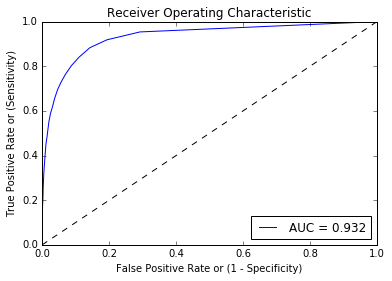

In [26]:
classifier(rf,X)

#### Logistic Regression

0.948027865484


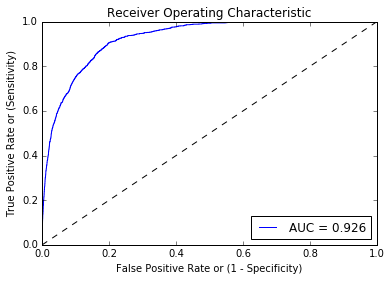

In [28]:
#Logistic Regression using all variables
classifier(logit,X)

### Testing on the test set

Logistic Regression with all of the original variables performs best on the training set, so I apply this model on the test file.

0.954211022233


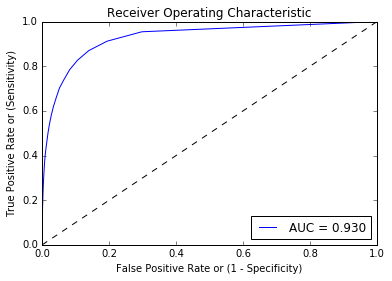

In [29]:
test_pp = rf.predict_proba(Xtest)
print(rf.score(Xtest, ytest))

#ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(ytest, test_pp[:,1])
roc_auc = metrics.auc(fpr, tpr)
%matplotlib inline
plt.plot(fpr, tpr, label='AUC = %0.3f' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate or (1 - Specificity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

On the test set, I get an accuracy near 95% as well as a *very* strong AUROC of about 0.93, meaning that the algorithm does a very good job of correctly predicting who saves more or less than 50,000 dollars.
Since I used so many variables in my algorithm, I suspect that I've overfitted the data and perhaps I can achieve an even higher accuracy and an even better AUROC with improved feature selection; but, I still think that this model performs very well.